In [3]:
!kaggle datasets download -d smeschke/four-shapes

 46% 9.00M/19.8M [00:00<00:00, 27.9MB/s]
100% 19.8M/19.8M [00:00<00:00, 49.8MB/s]


In [5]:
!unzip four-shapes.zip

Archive:  four-shapes.zip
  inflating: display_model.py        
  inflating: shapes.zip              
  inflating: make_model.py           
  inflating: process_data.py         


In [0]:
!unzip shapes.zip

In [0]:
import os

os.makedirs('./shapes/data')

In [0]:
!mv square 'shapes/data'

In [0]:
os.makedirs('shapes/data/valid/square')
os.makedirs('shapes/data/valid/star')
os.makedirs('shapes/data/valid/circle')
os.makedirs('shapes/data/valid/triangle')

In [0]:
import shutil

source = 'shapes/data/triangle/'
dest1 = 'shapes/data/valid/triangle/'

files = os.listdir(source)
a = 0
for f in files:
  if a < 300:
    shutil.move(source+f, dest1)
    
    a += 1

In [47]:
!pip install fastai

  Using cached https://files.pythonhosted.org/packages/f2/a2/71de7772121bac957c356f30e9fc71a44d19865ba1fb9ad35056fd682a23/fastai-0.7.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/5c/4e/23942de9d5c0fb16f10335fa83e52b431bcb8c0d4a8419c9ac206268c279/bcolz-1.2.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/08/55/940b97cc6f19a19f5dab9efef2f68a0ce43a7632f858b272391f0b851a7e/feather-format-0.4.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/47/87/313cd4ea4f75472826acb74c57f94fc83e04ba93e4ccf35656f6b7f502e2/graphviz-0.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ea/c5/0482342559f0fd24909572fe00bb59b2bae98b22d90aac7950f51a98f555/ipywidgets-7.4.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c2/d4/fe7e2637975c476734fcbf53776e650a29680194eb0dd21dbdc020ca92de/isoweek-1.3.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3d/68/8bbf0ef969095a13ba0d4c77c1945bd86

In [0]:
PATH = 'shapes/data/'

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


sz=224

In [4]:
files = !ls {PATH}valid | head
files

['circle', 'square', 'star', 'triangle']

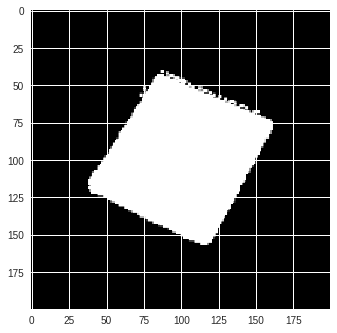

In [8]:
img = plt.imread(f'{PATH}valid/square/1011.png')
plt.imshow(img);

In [9]:
img.shape

(200, 200)

In [10]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.1, 10)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 102205583.93it/s]


100%|██████████| 19/19 [04:42<00:00, 14.85s/it]


epoch      trn_loss   val_loss   accuracy   
    0      0.052709   0.012964   0.999167  
    1      0.047673   0.009134   0.999167  
    2      0.037874   0.035386   0.9975    
    3      0.029378   0.01223    0.999167  
    4      0.020443   8.8e-05    1.0       
    5      0.034293   0.039      0.996667  
    6      0.032451   0.026484   0.9975    
    7      0.029124   0.020117   0.998333  
    8      0.01811    0.000135   1.0       
    9      0.027025   0.016863   0.998333  



[array([0.01686]), 0.9983333333333333]

In [11]:
data.val_y

array([0, 0, 0, ..., 3, 3, 3])

In [12]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['circle', 'square', 'star', 'triangle']

In [13]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(1200, 4)

In [14]:
log_preds[:10]

array([[ -0.00066,  -9.06991,  -8.85638,  -7.81283],
       [ -0.00022, -10.51406, -10.11093,  -8.82377],
       [ -0.00055, -10.11711,  -8.96537,  -7.86234],
       [ -0.00016, -10.68667,  -9.98856,  -9.34295],
       [ -0.00019, -11.21269,  -9.749  ,  -9.02604],
       [ -0.00048, -10.0577 ,  -8.92146,  -8.093  ],
       [ -0.00039, -10.09406,  -8.86508,  -8.49405],
       [ -0.00027, -10.47684,  -9.37124,  -8.76737],
       [ -0.00065,  -9.12159,  -8.71875,  -7.8935 ],
       [ -0.00038, -10.30999,  -9.1491 ,  -8.35213]], dtype=float32)

In [15]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)
probs

array([0.00012, 0.00003, 0.00004, ..., 0.     , 0.00017, 0.00001], dtype=float32)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


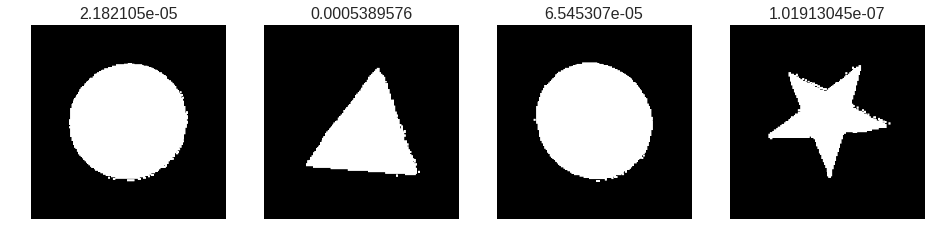

In [20]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most correct Cirlce guesses


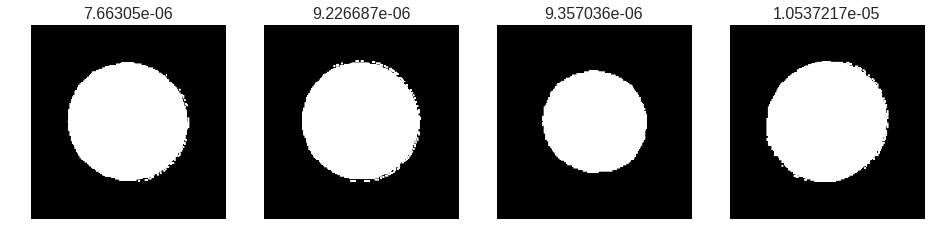

In [24]:
plot_val_with_title(most_by_correct(0, True), "Most correct Cirlce guesses")

Most correct Square guesses


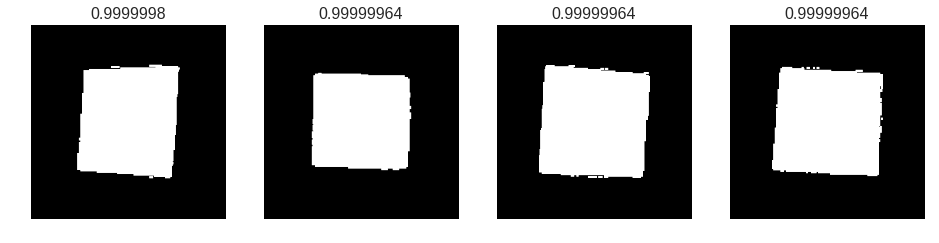

In [25]:
plot_val_with_title(most_by_correct(1, True), "Most correct Square guesses")

Most correct Star guesses


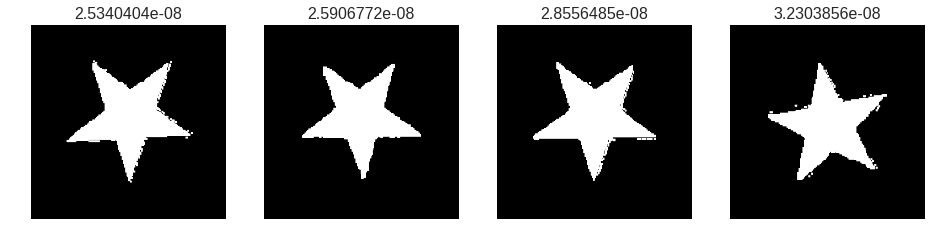

In [27]:
plot_val_with_title(most_by_correct(2, True), "Most correct Star guesses")

Most correct Triangle guesses


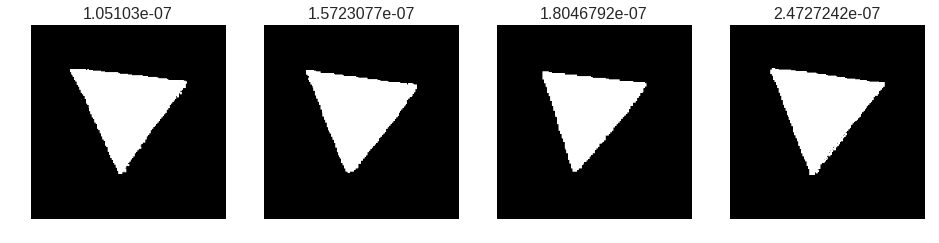

In [28]:
plot_val_with_title(most_by_correct(3, True), "Most correct Triangle guesses")

Most uncertain predictions


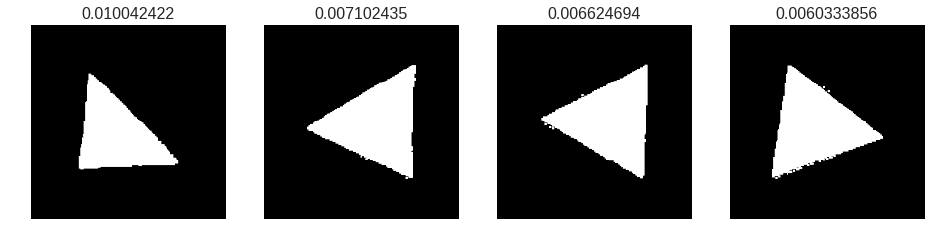

In [30]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [32]:
lrf=learn.lr_find()

epoch      trn_loss   val_loss   accuracy   
    0      1.517551   17.206257  0.869167  



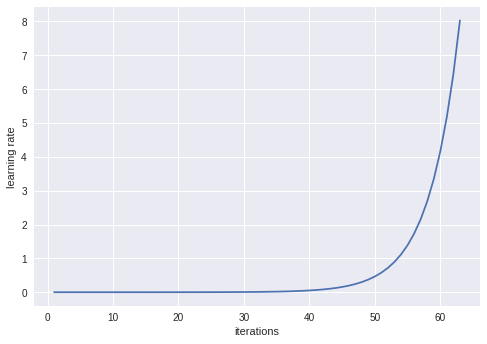

In [33]:

learn.sched.plot_lr()

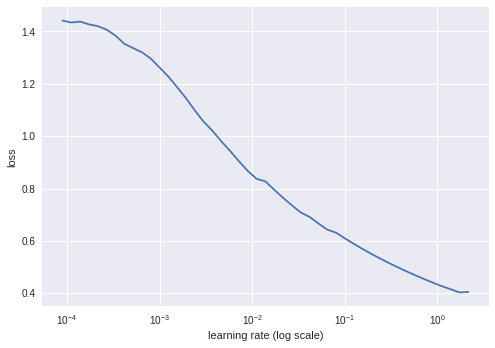

In [34]:
learn.sched.plot()

In [39]:

log_predslog_pred ,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)



In [42]:
probs.shape

(4,)